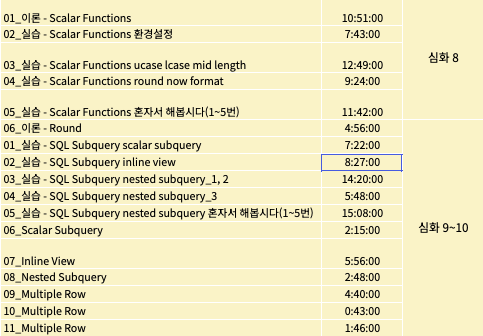

# 1. Scalar Functions

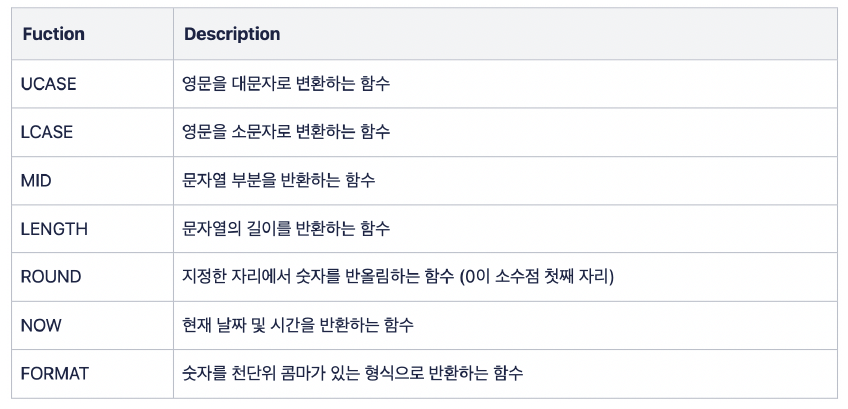

## 📍 UCASE
- 영문을 대문자로 반환하는 함수

In [ ]:
SELECT UCASE('This Is ucase Test.');

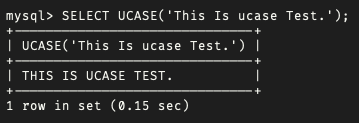

In [ ]:
# $15 가 넘는 메뉴를 대문자로 조회
SELECT UCASE(menu) FROM sandwich WHERE price > 15;

## 📍 LCASE
- 영문을 소문자로 변환하는 함수

In [ ]:
SELECT LCASE('This Is LCASE Test');

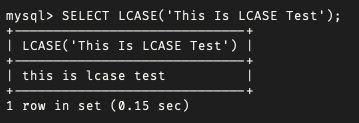

## 📍 MID
- 문자열 부분을 반환하는 함수

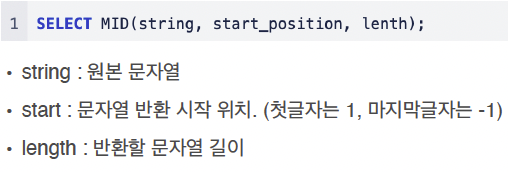

In [ ]:
# 6번 위치에서 5글자를 조회
SELECT MID('this is mid test', 6, 5);

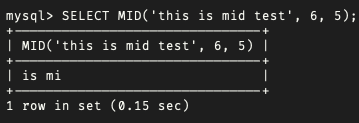

In [ ]:
# -8번 위치 (뒤에서 8번째 위치) 에서 3글자를 조회
SELECT MID('this is mid test', -8, 3);

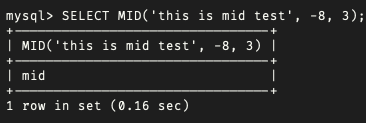

## 📍 LENGTH
- 문자열의 길이를 반환하는 함수

In [ ]:
SELECT LENGTH('this is len test');

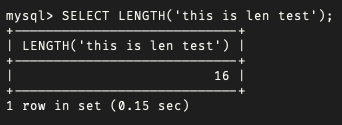

In [ ]:
SELECT LENGTH('');

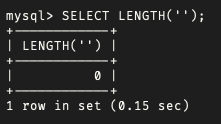

In [ ]:
SELECT LENGTH(' ');

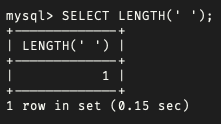

In [ ]:
SELECT LENGTH(NULL);

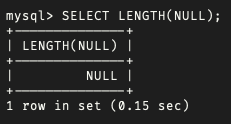

## 📍 ROUND
- 지정한 자리에서 숫자를 반올림하는 함수

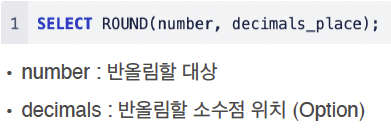

In [ ]:
# 반올림할 위치를 지정하지 않을 경우, 소수점 자리 (0) 에서 반올림
SELECT ROUND(315.625);

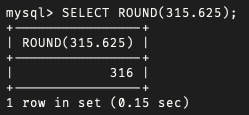

In [ ]:
# 세번째 소수점 위치는 2
SELECT ROUND(315.625, 2);

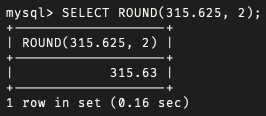

In [ ]:
# 십단위 위치는 -2
SELECT ROUND(315.625, -2);

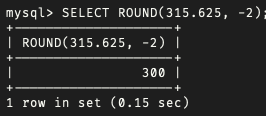

## 📍 NOW
- 현재 날짜 및 시간을 반환하는 함수

In [ ]:
SELECT NOW();

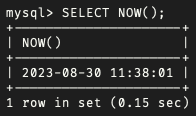

## 📍 FORMAT
- 숫자를 천단위 콤마가 있는 형식으로 반환하는 함수

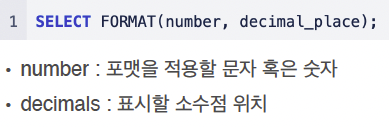

In [ ]:
# 소수점을 표시하지 않을 경우 0
SELECT FORMAT(12345.6789, 0);

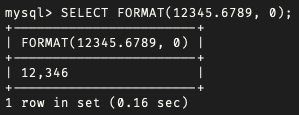

In [ ]:
SELECT FORMAT(12345.6789, 2);

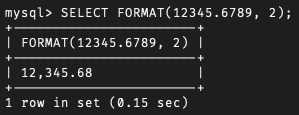

In [ ]:
SELECt FORMAT(12345.6789, 10);

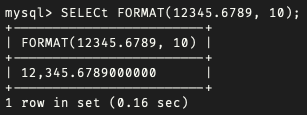

## 📍예제)

In [ ]:
# oil_price 테이블에서 가격을 십원단위에서 반올림해서 조회하세요.
SELECT 상호, ROUND(가격, -2) FROM oil_price;

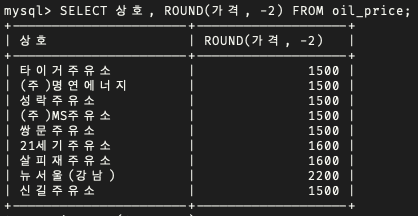

In [ ]:
# oil_price 테이블에서 가격이 십원단위에서 반올림 했을 때 2000원 이상인 경우,
# 천단위에 콤마를 넣어서 조회하세요.
SELECT 상호, FORMAT(ROUND(가격, -1), 0)
FROM oil_price
WHERE ROUND(가격, -1) >= 2000;

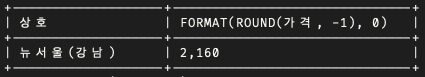

# 2. Subquery
- 하나의 SQL 문 안에 포함되어 있는 또 다른 SQL 문을 말한다.
- 메인쿼리가 서브쿼리를 포함하는 종속적인 관계이다.
- 서브쿼리는 메인쿼리의 칼럼 사용 가능
- 메인쿼리는 서브쿼리의 칼럼 사용 불가

## 📍 Subquery 사용시 주의
- Subquery 는 괄호로 묶어서 사용
- 단일 행 혹은 복수 행 비교 연산자와 함께 사용 가능
- subquery 에서는 order by 를 사용X

## 📍 Subquery  종류
- 스카라 서브쿼리 (Scalar Subquery) - SELECT 절에 사용
- 인라인 뷰 (Inline View) - FROM 절에 사용
- 중첩 서브쿼리 (Nested Subquery) - WHERE 절에 사용

## 📍 Scalar Subquery (스칼라 서브쿼리)
- SELECT 절에서 사용하는 서브쿼리. 결과는 하나의 Column 이어야 한다.

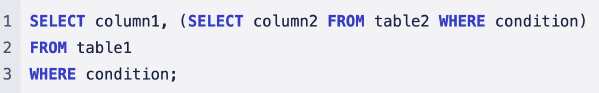

In [ ]:
# 서울은평경찰서의 강도 검거 건수와 서울시 경찰서 전체의 평균 강도 검거 건수를 조회
SELECT case_number, 
    (SELECT AVG(case_number) FROM crime_status
    WHERE crime_type = '강도' AND status_type = '검거') avg
FROM crime_status
WHERE police_station = '은평' 
AND crime_type = '강도'
AND status_type = '검거';

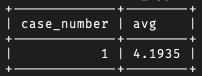

## 📍 Inline View (인라인 뷰)
- FROM 절에 사용하는 서브쿼리. 메인쿼리에서는 인라인 뷰에서 조회한 Column 만 사용가능하다.

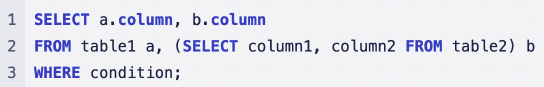

In [ ]:
# 경찰서 별로 가장 많이 발생한 범죄 건수와 범죄 유형을 조회
SELECT c.police_station, c.crime_type, c.case_number
FROM crime_status c,
    (SELECT police_station, max(case_number) count
    FROM crime_status
    WHERE status_type = '발생'
     GROUP BY police_station
    ) m
WHERE c.police_station = m.police_station
AND c.case_number = m.count;

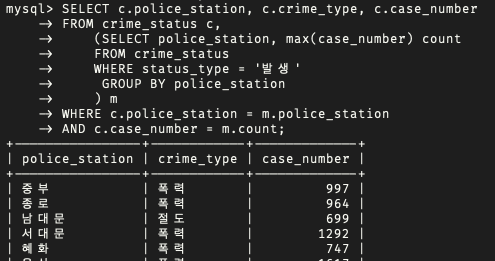

## 📍 Nested Subquery (중첩 서브쿼리)

- WHERE 절에서 사용하는 서브쿼리.
    - Single Row - 하나의 열을 검색하는 서브쿼리
    - Multiple Row - 하나 이상의 열을 검색하는 서브쿼리
    - Multiple Column - 하나 이상의 행을 검색하는 서브쿼리

- 서브쿼리가 비교연산자( =, >, >=, <, <=, <>, !=)와 사용되는 경우,
- 서브쿼리의 검색 결과는 한 개의 결과값을 가져야 한다. (두개 이상인 경우 에러)

In [ ]:
SELECT name FROM celeb 
WHERE name = (SELECT hot FROM snl_show WHERE id = 1);

### ⚡️ IN
- 서브쿼리 결과 중에 포함 될때

In [ ]:
# SNL 에 출연한 영화배우를 조회
SELECT host
FROM snl_show
WHERE host IN (SELECT name
              FROM celeb
              WHERE JOB_TITLE LIKE '%영화배우%');

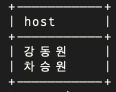

### ⚡️ EXIST
- 서브쿼리 결과에 값이 있으면 반환

In [ ]:
# 범죄 검거 혹은 발생 건수가 2000건 보다 큰 경찰서 조회 
SELECT name
FROM police_station p
WHERE EXISTS (SELECT police_station
             FROM crime_status c
             WHERE p.name = c.reference AND case_number > 2000);

### ⚡️ ANY
- 서브쿼리 결과 중에 최소한 하나라도 만족하면 (비교연산자 사용)

In [ ]:
# SNL 에 출연한 적이 있는 연예인 이름 조회
SELECT name
FROM celeb
WHERE name = ANY (SELECT host
                 FROM snl_show);

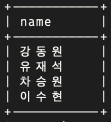

### ⚡️ ALL
- 서브쿼리 결과를 모두 만족하면 (비교 연산자 사용)

In [ ]:
SELECT name
FROM celeb
WHERE name = ALL (SELECT host
                 FROM snl_show
                 WHERE id = 1);

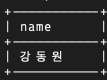

### ⚡️ Multi Column Subquery
- 서브쿼리 내에 메인쿼리 컬럼이 같이 사용되는 경우.

In [ ]:
SELECT name, sex, agency
FROM celeb
WHERE (sex, agency) IN (SELECT sex, agency FROM celeb WHERE name = '강동원');

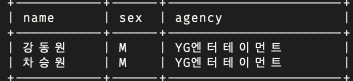